# Travaux routiers de Seine Maritime

import les librairies

In [1]:
import csv
import pandas as pd

## Chargement et nettoyage

Lecture du fichier cvs

In [2]:
data = pd.read_csv('CGDRSGDRDTRoutesdernierstravaux.csv', delimiter = ";")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5492 entries, 0 to 5491
Data columns (total 17 columns):
entityid                    5492 non-null object
route                       5492 non-null object
rub                         5492 non-null int64
age                         5492 non-null int64
mois                        5492 non-null int64
annee                       5492 non-null int64
prd                         5492 non-null int64
abd                         5492 non-null int64
prf                         5492 non-null int64
abf                         5492 non-null int64
cumuld                      5492 non-null int64
cumulf                      5492 non-null int64
long                        5492 non-null int64
epaisseurdernierstravaux    5492 non-null object
anneedernierstravaux        5492 non-null int64
naturedernierstravaux       5492 non-null object
supportdernierstravaux      5486 non-null object
dtypes: int64(12), object(5)
memory usage: 729.5+ KB


On voit que le type de epaisseurdernierstravaux est object. Ceci est du à l'importation du csv, nous n'avons pas défini le caractère représentant les décimales.

In [3]:
data = pd.read_csv('CGDRSGDRDTRoutesdernierstravaux.csv', delimiter = ";", decimal = ",")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5492 entries, 0 to 5491
Data columns (total 17 columns):
entityid                    5492 non-null object
route                       5492 non-null object
rub                         5492 non-null int64
age                         5492 non-null int64
mois                        5492 non-null int64
annee                       5492 non-null int64
prd                         5492 non-null int64
abd                         5492 non-null int64
prf                         5492 non-null int64
abf                         5492 non-null int64
cumuld                      5492 non-null int64
cumulf                      5492 non-null int64
long                        5492 non-null int64
epaisseurdernierstravaux    5492 non-null float64
anneedernierstravaux        5492 non-null int64
naturedernierstravaux       5492 non-null object
supportdernierstravaux      5486 non-null object
dtypes: float64(1), int64(12), object(4)
memory usage: 729.5+ KB


On a maintenant bien epaisseurdernierstravaux de type réel.
On vérifie qu'il n'y ait pas de valeurs manquantes dans le dataframe.

In [4]:
data.isnull().sum()

entityid                    0
route                       0
rub                         0
age                         0
mois                        0
annee                       0
prd                         0
abd                         0
prf                         0
abf                         0
cumuld                      0
cumulf                      0
long                        0
epaisseurdernierstravaux    0
anneedernierstravaux        0
naturedernierstravaux       0
supportdernierstravaux      6
dtype: int64

Il n'y a pas de NaN dans le dataframe.
Vérifions les valeurs aberrantes :

In [5]:
data.describe()

,rub,age,mois,annee,prd,abd,prf,abf,cumuld,cumulf,long,epaisseurdernierstravaux,anneedernierstravaux
count,5492.0,5492.0,5492.000000,5492.000000,5492.000000,5492.000000,5492.000000,5492.000000,5492.000000,5492.000000,5492.000000,5492.000000,5492.000000
mean,20.0,0.0,7.442098,8.410233,17.911143,471.999818,19.052986,526.152221,17854.609068,19047.932993,1193.323926,106.477810,2002.685907
std,0.0,0.0,2.247506,2.273855,21.058117,418.826419,21.135804,423.672007,20606.118584,20659.906627,1326.384627,1013.277896,11.412237
min,20.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1900.000000
25%,20.0,0.0,7.000000,7.000000,3.000000,154.000000,4.000000,235.000000,3355.000000,4550.000000,259.750000,1.000000,2000.000000
50%,20.0,0.0,7.000000,7.000000,11.000000,443.000000,12.000000,500.000000,10963.500000,12203.500000,724.000000,2.000000,2004.000000
75%,20.0,0.0,9.000000,9.000000,25.000000,730.000000,26.000000,760.000000,24485.500000,25850.250000,1679.250000,4.000000,2007.000000
max,20.0,0.0,12.000000,50.000000,132.000000,8000.000000,134.000000,8000.000000,131215.000000,133893.000000,10992.000000,9999.990000,2014.000000


On peut voir pour epaisseurdernierstravaux que le 75% des valeurs ont une épaisseur inférieure à 4, la moyenne est à 106 et le max est à 9999. Les valeurs à 9999 sont peu nombreuses et éloignées de la majorité des valeurs. Il est probable que cette valeur soit mise quand l'information est manquante.
Retirons donc les valeurs supérieures à 100.

In [6]:
data = data[data['epaisseurdernierstravaux'] < 100]

data.describe()

,rub,age,mois,annee,prd,abd,prf,abf,cumuld,cumulf,long,epaisseurdernierstravaux,anneedernierstravaux
count,5435.0,5435.0,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000
mean,20.0,0.0,7.442870,8.422999,18.035695,474.222447,19.184729,525.906900,17975.892364,19173.894204,1198.001840,2.718804,2003.524931
std,0.0,0.0,2.256101,2.280340,21.095761,412.511534,21.168612,417.216551,20632.998610,20684.053503,1328.880214,2.050025,6.742481
min,20.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1900.000000
25%,20.0,0.0,7.000000,7.000000,3.000000,160.000000,4.500000,236.000000,3459.500000,4665.000000,261.500000,1.000000,2000.000000
50%,20.0,0.0,7.000000,7.000000,11.000000,447.000000,12.000000,500.000000,11114.000000,12357.000000,728.000000,2.000000,2004.000000
75%,20.0,0.0,9.000000,9.000000,25.000000,732.000000,26.000000,760.000000,24680.000000,26047.000000,1683.000000,4.000000,2007.000000
max,20.0,0.0,12.000000,50.000000,132.000000,8000.000000,134.000000,8000.000000,131215.000000,133893.000000,10992.000000,30.000000,2014.000000


Les valeurs sont ici plus cohérentes.

## Anayse
### 1°

In [7]:
data['naturedernierstravaux'].unique()

array(['ES-BC', 'COUL', 'ES', 'BBUM', 'BBSG', 'BBSP', 'BB', 'BBTM', 'BBM',
       'BB-REP', 'ES-MC', 'ECF-BC', 'BBMP', 'ECF-MC', 'COUL-S', 'ESLGg',
       'BBELA', 'BBME', 'ES-SP', 'BETOFX', 'BBSGP', 'BBTMP', 'ESDGSP',
       'BBMM', 'BBELAS', 'BETOFL', 'BBCOL', 'BBSGM', 'BB+BBM', 'ESDG', 'I',
       'BBTMM', 'ESLG', 'PAVES', 'BB-RPR', 'BBMF', 'ESSP', 'ECF', 'BBEDC',
       'BBAUT'], dtype=object)

In [8]:
natureTravaux = pd.DataFrame(data['naturedernierstravaux'].copy())
natureTravaux['count'] = 1
natureTravaux.head()

,naturedernierstravaux,count
0,ES-BC,1
1,COUL,1
2,ES,1
3,BBUM,1
4,COUL,1


In [9]:
natureTravaux = natureTravaux.groupby('naturedernierstravaux').sum()
natureTravaux.head()

,count
naturedernierstravaux,
BB,1189
BB+BBM,2
BB-REP,178
BB-RPR,1
BBAUT,1


Visualisation de la répartition de la nature des travaux.

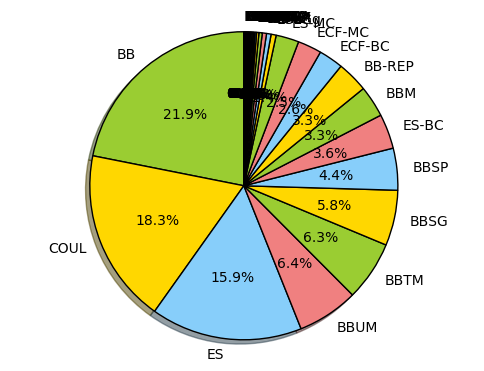

In [22]:
labels = natureTravaux.index.values
sizes = natureTravaux['count']

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

plt.pie(sizes, labels = labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.show()

In [10]:
natureTravaux.sort_values(by = ['count'], axis = 0, ascending = False, inplace = True)
natureTravaux.head(5)

,count
naturedernierstravaux,
BB,1189
COUL,994
ES,864
BBUM,348
BBTM,340


On peut voir ici que les 5 natures de travaux les plus fréquentes sont :
- BB
- COUL
- ES
- BBUM
- BBTM

### 2°

In [11]:
nombreTravaux = pd.DataFrame(data['annee'].copy())
nombreTravaux['count'] = 1
nombreTravaux.head()

,annee,count
0,7,1
1,7,1
2,7,1
3,9,1
4,7,1


In [12]:
nombreTravaux = nombreTravaux.groupby('annee').sum()
nombreTravaux

,count
annee,
1,1
4,1
5,2
7,3345
8,511
9,247
10,104
11,453
12,271


In [13]:
epaisseurTravaux = pd.DataFrame(data[['annee', 'epaisseurdernierstravaux']].copy())
epaisseurTravaux.head()

,annee,epaisseurdernierstravaux
0,7,1.5
1,7,1.0
2,7,1.0
3,9,2.0
4,7,1.0


In [14]:
epaisseurTravaux = epaisseurTravaux.groupby('annee').mean()
epaisseurTravaux

,epaisseurdernierstravaux
annee,
1,1.000000
4,0.000000
5,6.500000
7,2.614918
8,2.548337
9,2.832794
10,3.187500
11,3.111038
12,3.419557


In [15]:
df = nombreTravaux.merge(epaisseurTravaux, how='inner', left_index = True, right_index = True)
df

,count,epaisseurdernierstravaux
annee,,
1,1,1.000000
4,1,0.000000
5,2,6.500000
7,3345,2.614918
8,511,2.548337
9,247,2.832794
10,104,3.187500
11,453,3.111038
12,271,3.419557


Visualisation du nombre et de l'épaisseur moyenne des travaux par année.

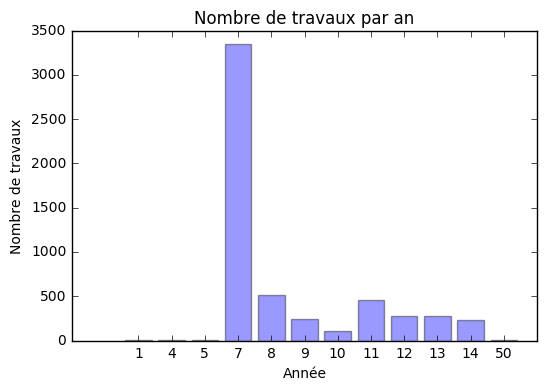

In [16]:
import matplotlib.pyplot as plt
import numpy as np

annees = df.index.values
x_pos = np.arange(len(df.index))
nbTravaux = df['count']

plt.bar(x_pos, nbTravaux, align='center', alpha=0.4)
plt.xticks(x_pos, annees)
plt.xlabel('Année')
plt.ylabel('Nombre de travaux')
plt.title('Nombre de travaux par an')

plt.show()

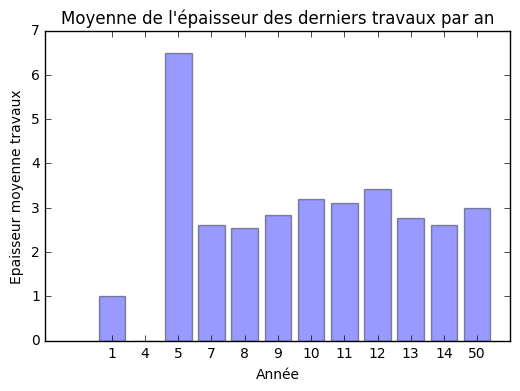

In [17]:
plt.close()

annees = df.index.values
x_pos = np.arange(len(df.index))
epTravaux = df['epaisseurdernierstravaux']

plt.bar(x_pos, epTravaux, align='center', alpha=0.4)
plt.xticks(x_pos, annees)
plt.xlabel('Année')
plt.ylabel('Epaisseur moyenne travaux')
plt.title('Moyenne de l\'épaisseur des derniers travaux par an')

plt.show()

In [18]:
df.sort_values(by = ['epaisseurdernierstravaux'], axis = 0, ascending = False, inplace = True)
df

,count,epaisseurdernierstravaux
annee,,
5,2,6.500000
12,271,3.419557
10,104,3.187500
11,453,3.111038
50,1,3.000000
9,247,2.832794
13,273,2.762271
7,3345,2.614918
14,226,2.607522
